<h1>Ley de cuotas</h1>

<br>

<h2>Participantes</h2>

<ul>
 <li type="circle">Diana Rozo, Tématico,  drozo@funcionpublica.gov.co</li>
 <li type="circle">Maritza Ibarra Duarte, Analista de datos,  mibarra@funcionpublica.gov.co</li>
 <li type="circle">Camilo Alejandro Tamayo Quintana, Analista de datos,  ctamayo@funcionpublica.gov.co</li>
 <li type="circle">Karol Wilfredo Camargo Vargas, Analista de negocio, kcamargo@funcionpublica.gov.co</li>
 <li type="circle">Miguel Sebastian Rincon Ortega, Analista de datos, mrincon@funcionpublica.gov.co</li>
</ul>

<h1>Preparación de los Datos</h1>

<h2>Integración de los de datos</h2>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_excel('examplefin2.xlsx', dtype = str)

<h2>descripción estadística de los datos </h2>

In [2]:
print("Filas:",df.shape[0],"Columnas:",df.shape[1])
print("--"*50)
print(df.notnull().sum()/df.shape[0]*100)

Filas: 6403 Columnas: 21
----------------------------------------------------------------------------------------------------
COD_INSTITUCION                            100.000000
NOMBRE                                     100.000000
CATEGORIAMUNI                               99.390911
CLASIFICACION_ORGANICA                     100.000000
NATURALEZA_JURIDICA                        100.000000
ORDEN                                      100.000000
ES_CABEZA_S                                 99.500234
NIVEL_INSTITUCION                          100.000000
TIPO_INSTITUCION                           100.000000
REPORTO                                    100.000000
2016                                         9.495549
2017                                        20.162424
2018                                        12.431673
2019                                        31.797595
2020                                        40.215524
TOTAL_PLANTAS                               96.907700
LIBRE NOMB

In [3]:
df2 = df[df['Debe reportar'].notnull()]
print("Filas:",df2.shape[0],"Columnas:",df2.shape[1])
print("--"*50)
print(df2.notnull().sum()/df2.shape[0]*100)

Filas: 670 Columnas: 21
----------------------------------------------------------------------------------------------------
COD_INSTITUCION                            100.000000
NOMBRE                                     100.000000
CATEGORIAMUNI                              100.000000
CLASIFICACION_ORGANICA                     100.000000
NATURALEZA_JURIDICA                        100.000000
ORDEN                                      100.000000
ES_CABEZA_S                                 98.955224
NIVEL_INSTITUCION                          100.000000
TIPO_INSTITUCION                           100.000000
REPORTO                                    100.000000
2016                                        17.014925
2017                                        25.074627
2018                                        16.268657
2019                                        37.910448
2020                                        43.880597
TOTAL_PLANTAS                               98.358209
LIBRE NOMBR

In [4]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
df2["CLASIFICACION_ORGANICA_CODE"] = ord_enc.fit_transform(df2[["CLASIFICACION_ORGANICA"]])
df2[["CLASIFICACION_ORGANICA", "CLASIFICACION_ORGANICA_CODE"]].head(4)

ord_enc2 = LabelEncoder()
df2["TIPO_INSTITUCION_CODE"] = ord_enc2.fit_transform(df2[["TIPO_INSTITUCION"]])
df2[["TIPO_INSTITUCION", "TIPO_INSTITUCION_CODE"]].head(4)

C:\Users\MISERIOR\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-4-b94c10203c48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["CLASIFICACION_ORGANICA_CODE"] = ord_enc.fit_transform(df2[["CLASIFICACION_ORGANICA"]])
<ipython-input-4-b94c10203c48>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,TIPO_INSTITUCION,TIPO_INSTITUCION_CODE
3,Vinculación,5
5,Vinculación,5
15,Adscripción,0
16,No Aplica,2


In [5]:
print(df2.groupby(by='CLASIFICACION_ORGANICA', axis=0)['CLASIFICACION_ORGANICA_CODE'].mean())
print("--"*50)
print(df2.groupby(by='TIPO_INSTITUCION', axis=0)['TIPO_INSTITUCION_CODE'].mean())

CLASIFICACION_ORGANICA
Corporaciones administrativas         0
Ejecutiva                             1
Entes autónomos                       2
Judicial                              3
Legislativa                           4
Organismos de control y vigilancia    5
Name: CLASIFICACION_ORGANICA_CODE, dtype: int32
----------------------------------------------------------------------------------------------------
TIPO_INSTITUCION
Adscripción         0
Cabeza              1
No Aplica           2
Otro                3
Régimen Autónomo    4
Vinculación         5
Name: TIPO_INSTITUCION_CODE, dtype: int32


<AxesSubplot:xlabel='TIPO_INSTITUCION_CODE', ylabel='count'>

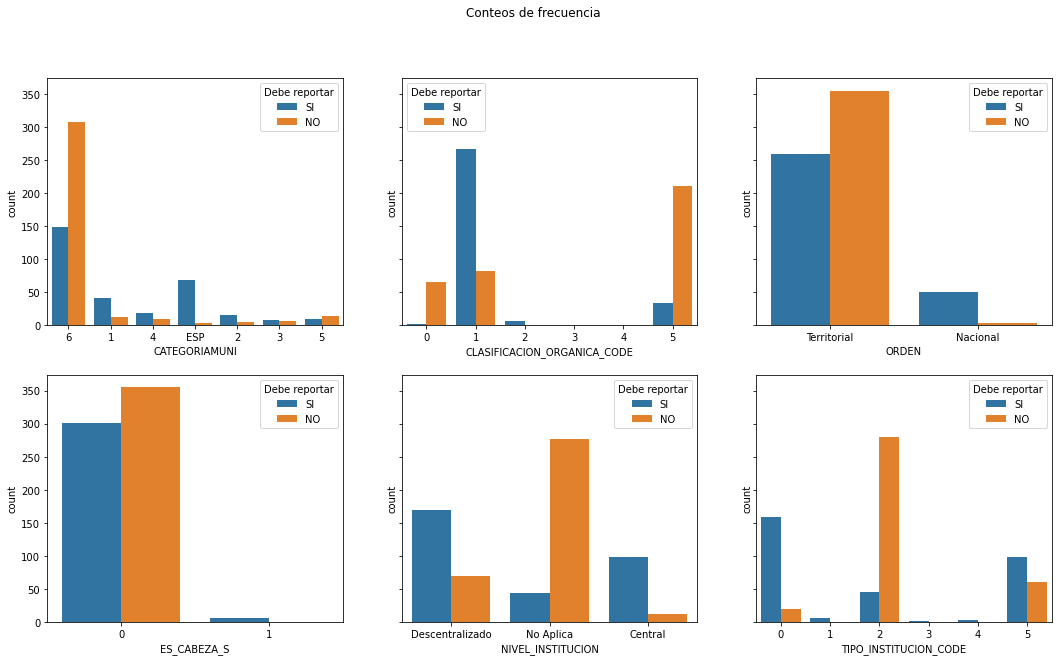

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
fig.suptitle('Conteos de frecuencia')
sns.countplot(ax=axes[0,0], x="CATEGORIAMUNI", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[0,1], x="CLASIFICACION_ORGANICA_CODE", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[0,2], x="ORDEN", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[1,0], x="ES_CABEZA_S", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[1,1], x="NIVEL_INSTITUCION", hue="Debe reportar", data=df2)
sns.countplot(ax=axes[1,2], x="TIPO_INSTITUCION_CODE", hue="Debe reportar", data=df2)

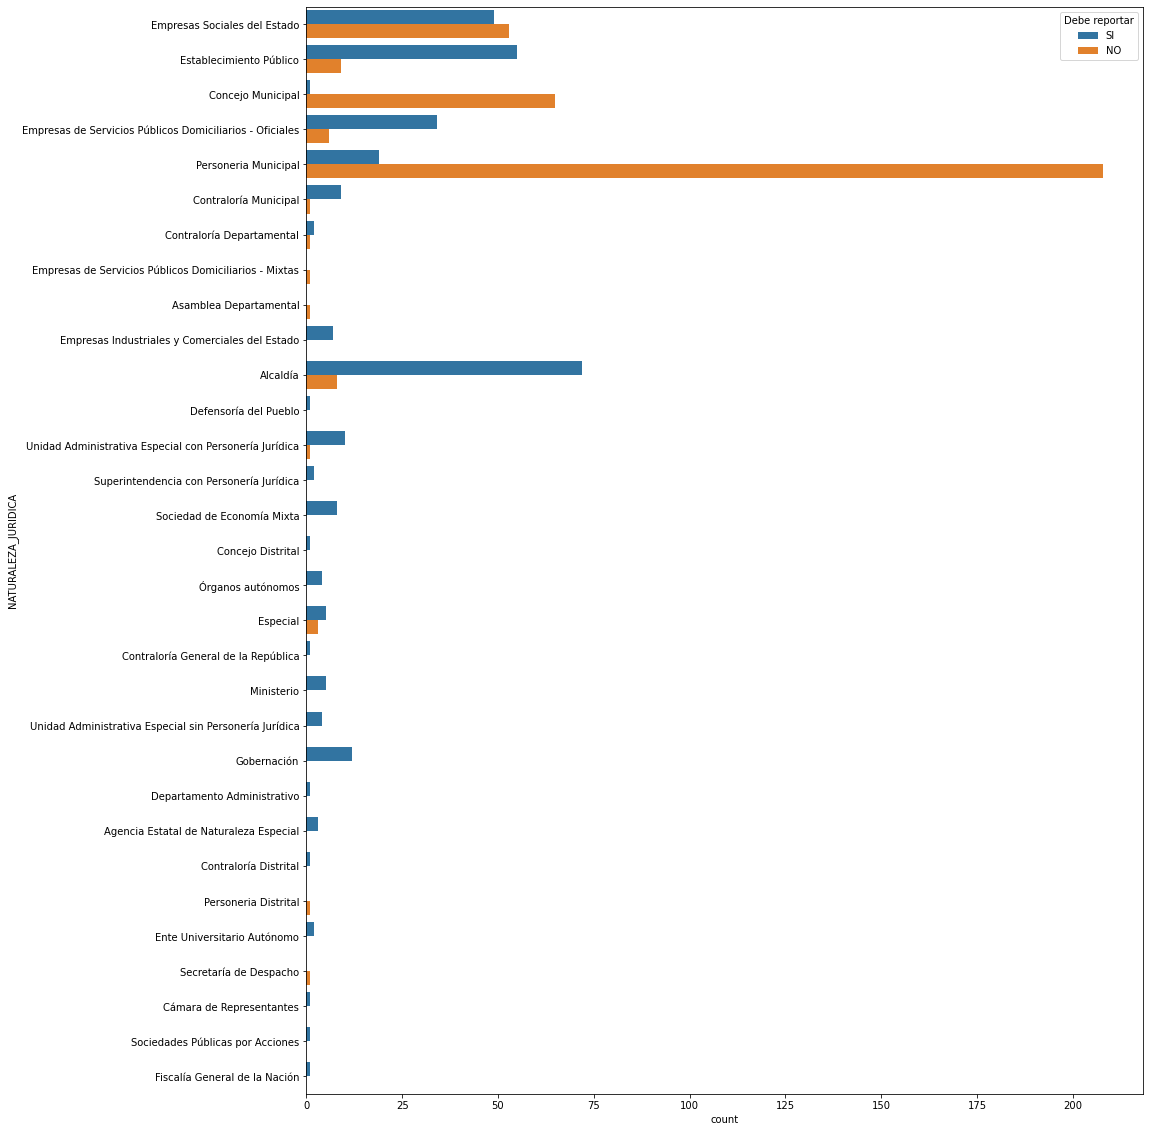

In [70]:
sns.countplot(y="NATURALEZA_JURIDICA", hue="Debe reportar", data=df2)
plt.gcf().set_size_inches(15, 20)

<h2>Limpieza</h2>

In [7]:
from sklearn.impute import SimpleImputer
df2['ES_CABEZA_S'] = df2['ES_CABEZA_S'].fillna(df2['ES_CABEZA_S'].mode()[0])
df2['CATEGORIAMUNI'] = df2['CATEGORIAMUNI'].fillna(df2['CATEGORIAMUNI'].mode()[0])

<ipython-input-7-e41e909f8414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ES_CABEZA_S'] = df2['ES_CABEZA_S'].fillna(df2['ES_CABEZA_S'].mode()[0])
<ipython-input-7-e41e909f8414>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CATEGORIAMUNI'] = df2['CATEGORIAMUNI'].fillna(df2['CATEGORIAMUNI'].mode()[0])


In [8]:
print("Se realiza la imputación de los datos faltantes observe la variable categoría municipio y es cabeza: ")
print("--"*50)
print("Filas:",df2.shape[0],"Columnas:",df2.shape[1])
print("--"*50)
print(df2.notnull().sum()/df2.shape[0]*100)

Se realiza la imputación de los datos faltantes observe la variable categoría municipio y es cabeza: 
----------------------------------------------------------------------------------------------------
Filas: 670 Columnas: 23
----------------------------------------------------------------------------------------------------
COD_INSTITUCION                            100.000000
NOMBRE                                     100.000000
CATEGORIAMUNI                              100.000000
CLASIFICACION_ORGANICA                     100.000000
NATURALEZA_JURIDICA                        100.000000
ORDEN                                      100.000000
ES_CABEZA_S                                100.000000
NIVEL_INSTITUCION                          100.000000
TIPO_INSTITUCION                           100.000000
REPORTO                                    100.000000
2016                                        17.014925
2017                                        25.074627
2018                    

In [46]:
# Las columnas irrelevantes son eliminadas del conjunto de datos 
df3 = df2.drop(['COD_INSTITUCION','NOMBRE','2016','2017','2018','2019','2020','ESTADO',
                'CLASIFICACION_ORGANICA_CODE','TIPO_INSTITUCION_CODE',
               'LIBRE NOMBRAMIENTO Y REMOCIÓN FEMENINO',
       'LIBRE NOMBRAMIENTO Y REMOCIÓN MASCULINO',
       'Total LIBRE NOMBRAMIENTO Y REMOCIÓN'], axis=1)

<h2>Creación de nueva variables</h2>

In [47]:
# Se crean nuevas variables dummies 
df3 = pd.get_dummies(df3, columns=['CATEGORIAMUNI', 'CLASIFICACION_ORGANICA', 'NATURALEZA_JURIDICA',
       'NIVEL_INSTITUCION', 'TIPO_INSTITUCION'])
df3 = pd.get_dummies(df3, columns=['ORDEN'], drop_first=True)
df3 = pd.get_dummies(df3, columns=['REPORTO'], drop_first=True)
df3 = pd.get_dummies(df3, columns=['Debe reportar'], drop_first=True)

In [48]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df3)
df3[:] = imputer.transform(df3)

In [49]:
print("Se realiza la imputación de los datos faltantes observe la variable categoría municipio y es cabeza: ")
print("--"*50)
print("Filas:",df3.shape[0],"Columnas:",df3.shape[1])
print("--"*50)
print(df3.notnull().sum()/df3.shape[0]*100)

Se realiza la imputación de los datos faltantes observe la variable categoría municipio y es cabeza: 
----------------------------------------------------------------------------------------------------
Filas: 670 Columnas: 58
----------------------------------------------------------------------------------------------------
ES_CABEZA_S                                                                     100.0
TOTAL_PLANTAS                                                                   100.0
CATEGORIAMUNI_1                                                                 100.0
CATEGORIAMUNI_2                                                                 100.0
CATEGORIAMUNI_3                                                                 100.0
CATEGORIAMUNI_4                                                                 100.0
CATEGORIAMUNI_5                                                                 100.0
CATEGORIAMUNI_6                                                       

In [50]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df3[:] = min_max_scaler.fit_transform(df3)


<h2>Análisis de correlaciones</h2>

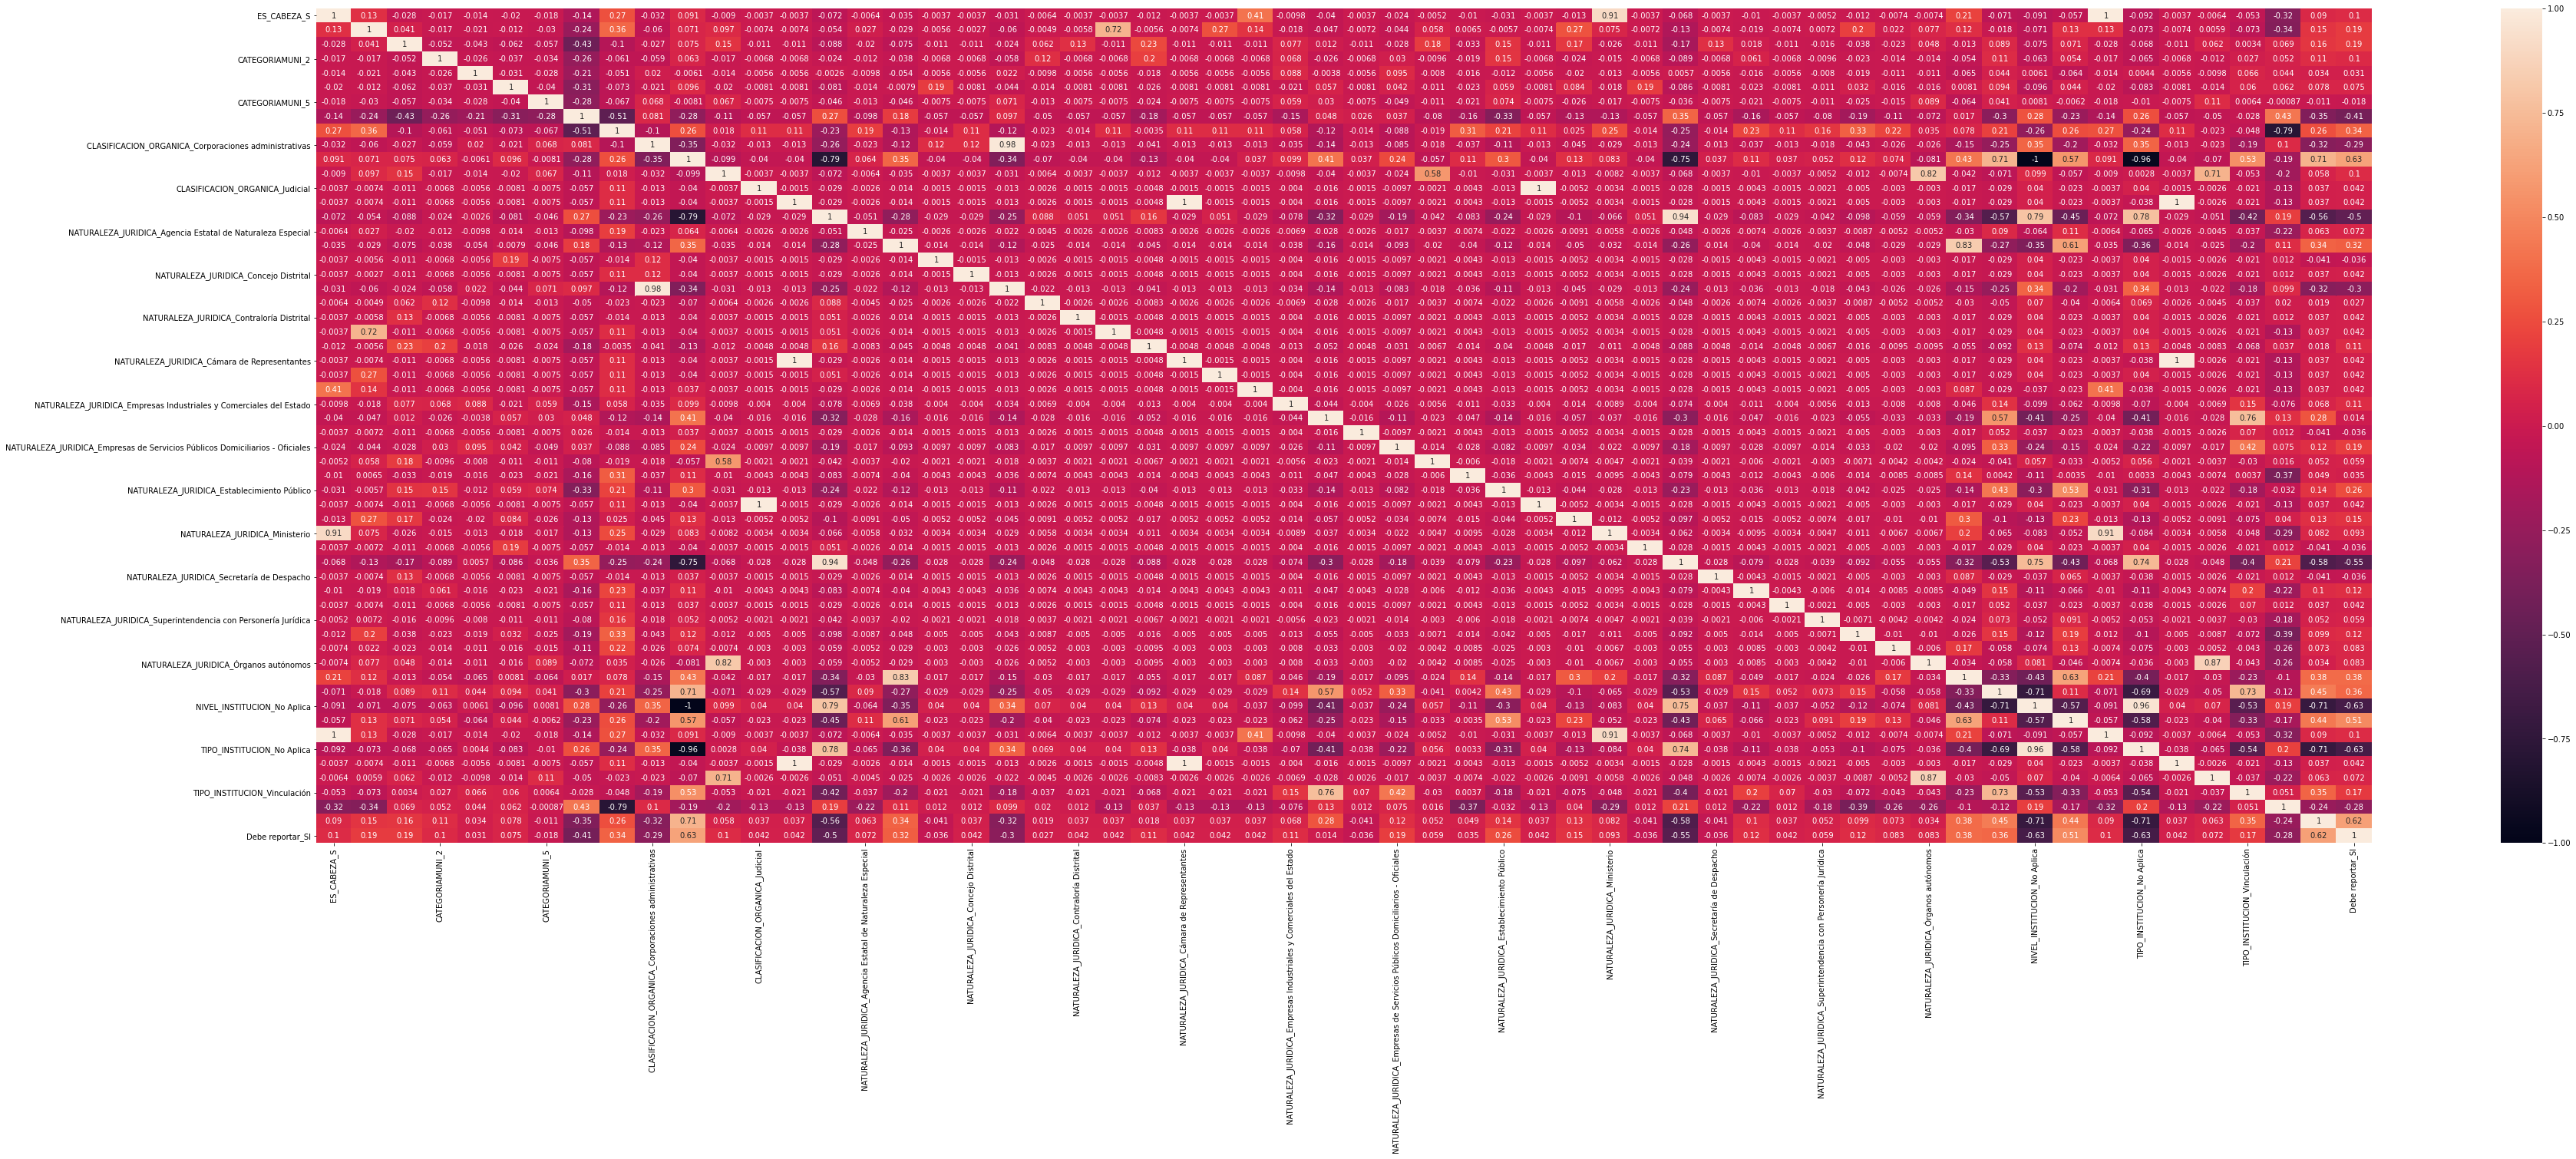

In [15]:
import seaborn as sn

# ¿Hay variables que representen lo mismo? ¿Hay variables que no describan la variable objetivo?
corrMatrix = df3.corr()

# Salida en excel
corrMatrix.to_excel('corrMatrix.xlsx', sheet_name='example')
sn.heatmap(corrMatrix, annot=True)
plt.gcf().set_size_inches(60, 20)
plt.show()

<h2>Reducción de variables</h2>

In [51]:
# Hay variables que tienen una baja correlacion con la variable objetivo eliminarlas

df3 = df3.drop(['ES_CABEZA_S', 'TOTAL_PLANTAS', 'CATEGORIAMUNI_1', 'CATEGORIAMUNI_2', 'CATEGORIAMUNI_3', 'CATEGORIAMUNI_4', 'CATEGORIAMUNI_5', 'CLASIFICACION_ORGANICA_Entes autónomos', 'CLASIFICACION_ORGANICA_Judicial', 'CLASIFICACION_ORGANICA_Legislativa', 'NATURALEZA_JURIDICA_Agencia Estatal de Naturaleza Especial', 'NATURALEZA_JURIDICA_Asamblea Departamental', 'NATURALEZA_JURIDICA_Concejo Distrital', 'NATURALEZA_JURIDICA_Contraloría Departamental', 'NATURALEZA_JURIDICA_Contraloría Distrital', 'NATURALEZA_JURIDICA_Contraloría General de la República', 'NATURALEZA_JURIDICA_Contraloría Municipal', 'NATURALEZA_JURIDICA_Cámara de Representantes', 'NATURALEZA_JURIDICA_Defensoría del Pueblo', 'NATURALEZA_JURIDICA_Departamento Administrativo', 'NATURALEZA_JURIDICA_Empresas Industriales y Comerciales del Estado', 'NATURALEZA_JURIDICA_Empresas Sociales del Estado', 'NATURALEZA_JURIDICA_Empresas de Servicios Públicos Domiciliarios - Mixtas', 'NATURALEZA_JURIDICA_Empresas de Servicios Públicos Domiciliarios - Oficiales', 'NATURALEZA_JURIDICA_Ente Universitario Autónomo', 'NATURALEZA_JURIDICA_Especial', 'NATURALEZA_JURIDICA_Fiscalía General de la Nación', 'NATURALEZA_JURIDICA_Gobernación', 'NATURALEZA_JURIDICA_Ministerio', 'NATURALEZA_JURIDICA_Personeria Distrital', 'NATURALEZA_JURIDICA_Secretaría de Despacho', 'NATURALEZA_JURIDICA_Sociedad de Economía Mixta', 'NATURALEZA_JURIDICA_Sociedades Públicas por Acciones', 'NATURALEZA_JURIDICA_Superintendencia con Personería Jurídica', 'NATURALEZA_JURIDICA_Unidad Administrativa Especial con Personería Jurídica', 'NATURALEZA_JURIDICA_Unidad Administrativa Especial sin Personería Jurídica', 'NATURALEZA_JURIDICA_Órganos autónomos', 'TIPO_INSTITUCION_Cabeza', 'TIPO_INSTITUCION_Otro', 'TIPO_INSTITUCION_Régimen Autónomo', 'TIPO_INSTITUCION_Vinculación'], axis=1)

<h2>Balanceo de datos</h2>

In [53]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

<h1>División de datos</h1>

In [52]:
# Se separa el conjunto de la variable a predecir 

Y = df3[['Debe reportar_SI']]
X = df3.drop(['Debe reportar_SI'], axis=1)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

<h2>Aprendizaje y evaluación</h2>

Parámteros 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 7, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
----------------------------------------------------------------------------------------------------


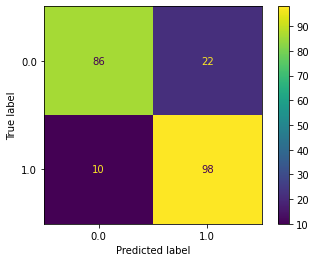

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

SEED = 42
random_forest_model_0 = RandomForestClassifier(random_state = SEED, n_estimators=7)
random_forest_model_0.fit(X_train, y_train.values.ravel())

predicted = random_forest_model_0.predict(X_test)

print("Parámteros \n",random_forest_model_0.get_params())
print("--"*50)

plot_confusion_matrix(random_forest_model_0, X_test, y_test)  
plt.show()

In [42]:
print(df3.notnull().sum()/df2.shape[0]*100)

ES_CABEZA_S                                                                     100.0
TOTAL_PLANTAS                                                                   100.0
CATEGORIAMUNI_1                                                                 100.0
CATEGORIAMUNI_2                                                                 100.0
CATEGORIAMUNI_6                                                                 100.0
CATEGORIAMUNI_ESP                                                               100.0
CLASIFICACION_ORGANICA_Corporaciones administrativas                            100.0
CLASIFICACION_ORGANICA_Ejecutiva                                                100.0
CLASIFICACION_ORGANICA_Entes autónomos                                          100.0
CLASIFICACION_ORGANICA_Organismos de control y vigilancia                       100.0
NATURALEZA_JURIDICA_Alcaldía                                                    100.0
NATURALEZA_JURIDICA_Concejo Municipal                 

Parámteros 
%s {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
----------------------------------------------------------------------------------------------------


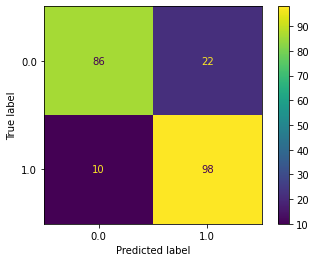

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn_model_feat = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model_feat.fit(X_train, y_train.values.ravel())

predicted = knn_model_feat.predict(X_test)

print("Parámteros \n%s",knn_model_feat.get_params())
print("--"*50)

plot_confusion_matrix(knn_model_feat, X_test, y_test)  
plt.show()

<h2>Predicción futura </h2>

In [75]:
df3.columns

Index(['CATEGORIAMUNI_6', 'CATEGORIAMUNI_ESP',
       'CLASIFICACION_ORGANICA_Corporaciones administrativas',
       'CLASIFICACION_ORGANICA_Ejecutiva',
       'CLASIFICACION_ORGANICA_Organismos de control y vigilancia',
       'NATURALEZA_JURIDICA_Alcaldía', 'NATURALEZA_JURIDICA_Concejo Municipal',
       'NATURALEZA_JURIDICA_Establecimiento Público',
       'NATURALEZA_JURIDICA_Personeria Municipal', 'NIVEL_INSTITUCION_Central',
       'NIVEL_INSTITUCION_Descentralizado', 'NIVEL_INSTITUCION_No Aplica',
       'TIPO_INSTITUCION_Adscripción', 'TIPO_INSTITUCION_No Aplica',
       'ORDEN_Territorial', 'REPORTO_1', 'Debe reportar_SI'],
      dtype='object')

In [76]:
dftest = df.loc[:]

dftest['ES_CABEZA_S'] = dftest['ES_CABEZA_S'].fillna(dftest['ES_CABEZA_S'].mode()[0])
dftest['CATEGORIAMUNI'] = dftest['CATEGORIAMUNI'].fillna(dftest['CATEGORIAMUNI'].mode()[0])

dftest = pd.get_dummies(dftest, columns=['CATEGORIAMUNI', 'CLASIFICACION_ORGANICA', 'NATURALEZA_JURIDICA',
       'NIVEL_INSTITUCION', 'TIPO_INSTITUCION'])
dftest = pd.get_dummies(dftest, columns=['ORDEN'], drop_first=True)
dftest = pd.get_dummies(dftest, columns=['REPORTO'], drop_first=True)

dftest = dftest[['CATEGORIAMUNI_6', 'CATEGORIAMUNI_ESP',
       'CLASIFICACION_ORGANICA_Corporaciones administrativas',
       'CLASIFICACION_ORGANICA_Ejecutiva',
       'CLASIFICACION_ORGANICA_Organismos de control y vigilancia',
       'NATURALEZA_JURIDICA_Alcaldía', 'NATURALEZA_JURIDICA_Concejo Municipal',
       'NATURALEZA_JURIDICA_Establecimiento Público',
       'NATURALEZA_JURIDICA_Personeria Municipal', 'NIVEL_INSTITUCION_Central',
       'NIVEL_INSTITUCION_Descentralizado', 'NIVEL_INSTITUCION_No Aplica',
       'TIPO_INSTITUCION_Adscripción', 'TIPO_INSTITUCION_No Aplica',
       'ORDEN_Territorial', 'REPORTO_1']]

from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(dftest)
dftest[:] = imputer.transform(dftest)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
dftest[:] = min_max_scaler.fit_transform(dftest)

df['PREDICT'] = knn_model_feat.predict(dftest)

#Salida en excel
df.to_excel('predicted2.xlsx', sheet_name='example')

<h1>Predicción valores futuros ley de cuotas</h1>

In [4]:
import pandas as pd

dfLR=pd.read_excel('historico.xlsx')

In [5]:
y = dfLR['part'].to_numpy()
X = dfLR['anno'].to_numpy().reshape((-1, 1))

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

model.fit(X, y)
y_predicted = model.predict(X)
print("Para 2022 Ley de cuotas es de:",model.predict(np.array([2022]).reshape(-1, 1)))

from sklearn.metrics import r2_score
print("Coeficiente de determinación:", r2_score(y_predicted, y))

Para 2022 Ley de cuotas es de: [0.47323831]
Coeficiente de determinación: 0.6370429693466295


In [7]:
model.predict(np.array([[2022],[2023],[2024],[2025]]).reshape(-1, 1))
fut=np.array([[2022],[2023],[2024],[2025]]).reshape(-1, 1)
pt=model.predict(fut)

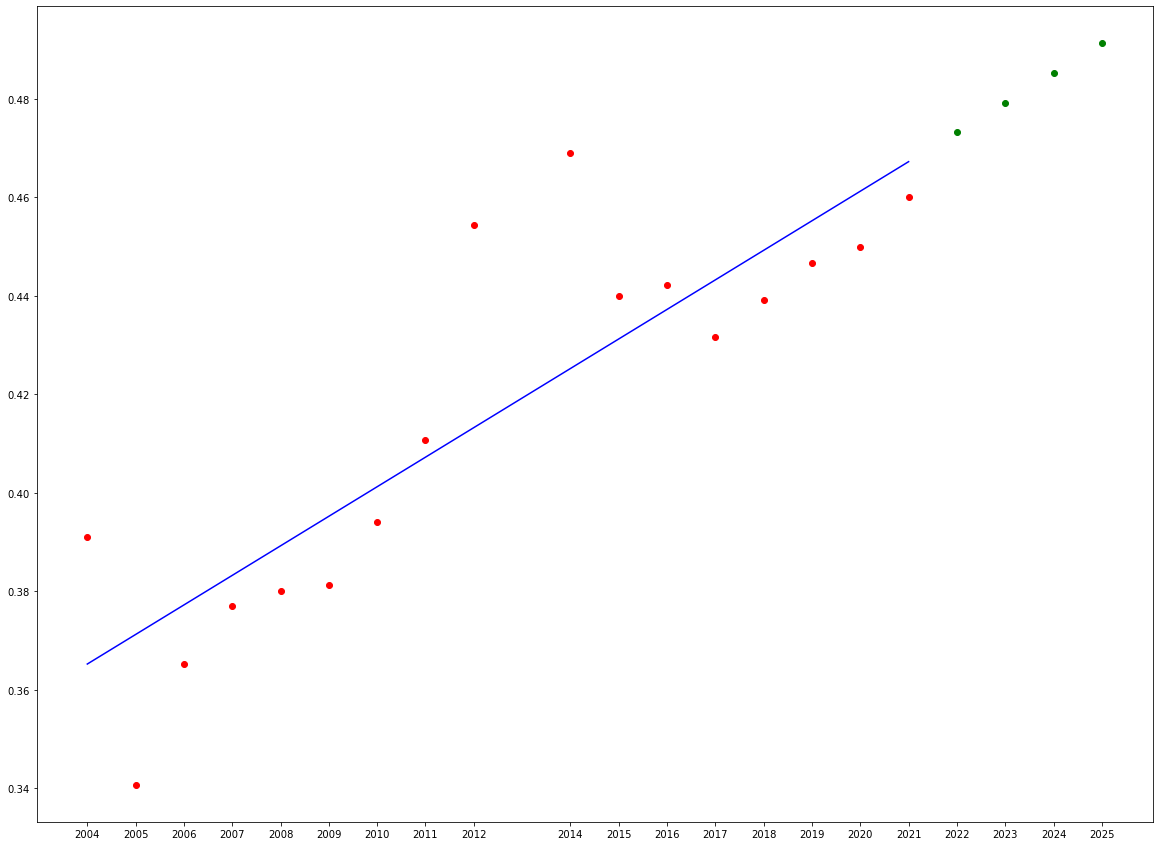

In [10]:
import matplotlib.pyplot as plt
def viz_linear():
    plt.rcParams["figure.figsize"] = (20,15)
    plt.scatter(X, y, color='red')
    plt.scatter(fut, pt, color='green')
    plt.plot(X, model.predict(X), color='blue')
    plt.xticks([2004,2005,2006,2007,2008,2009,2010,2011,2012,2014,2015,2016, 2017, 2018, 2019, 2020,2021,2022,2023,2024,2025])
    plt.show()
    return
viz_linear()

In [9]:
fut=np.array([[2022],[2023],[2024],[2025]]).reshape(-1, 1)
pt=model.predict(fut)
print(pt)

[0.47323831 0.47923765 0.48523699 0.49123633]


In [43]:
df3['TOTAL_PLANTAS']

3       0.002636
5       0.001611
15      0.000586
16      0.000146
18      0.000146
          ...   
2727    0.003075
2729    0.000000
2769    0.095182
2819    0.022609
2820    0.006209
Name: TOTAL_PLANTAS, Length: 670, dtype: float64